In [1]:
import numpy as np
import glob
import os
import nibabel as nib

import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.masking import compute_multi_epi_mask, intersect_masks
from nilearn.image import swap_img_hemispheres

import llms_brain_lateralization as lbl

In [2]:
subject_list = np.sort(glob.glob(os.path.join(lbl.fmri_data_resampled, 'sub-EN*')))

fmri_imgs_subs = []
for sub_id in subject_list:
    sub_id_basename = os.path.basename(sub_id)
    fmri_imgs_subs.append(sorted(glob.glob(os.path.join(sub_id, '*.nii.gz'))))

mask = compute_multi_epi_mask(np.concatenate(fmri_imgs_subs), threshold=0.5)

In [3]:
# symmetrize the mask
mask_sym = intersect_masks([mask, swap_img_hemispheres(mask)], threshold=1) 

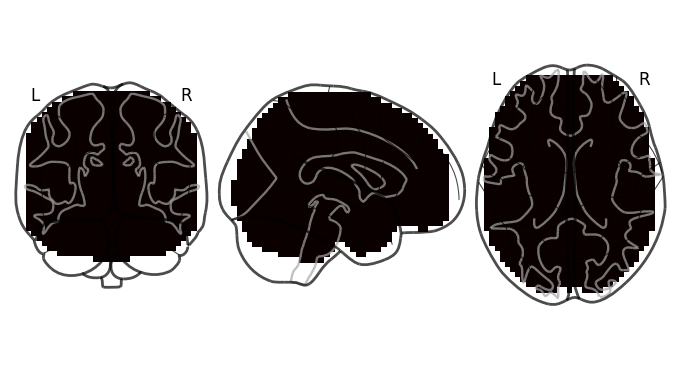

In [4]:
plotting.plot_glass_brain(mask_sym)
plotting.show()

In [5]:
# how many voxels
print(np.flatnonzero(np.array(mask_sym.get_fdata()>0)).size)

25877


In [6]:
nib.save(mask_sym, 'mask_lpp_en.nii.gz')